# Preprocessing

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
%cd /content/drive/MyDrive/Dataset/Diarrhea
%ls

/content/drive/MyDrive/Dataset/Diarrhea
 cos1.dot        Diare3.csv      golf_df.csv               search4.csv
 CusDiare2.csv   Diare.csv      'Laporan Diare 2019.xls'   search.csv
 cusdm1.csv      dm01.csv        modelDT.pkl               tree2.dot
 cusdm2.csv      dm02.csv        normal.pkl                tree3.dot
 cusdm3.csv      dm03.csv        over.pkl                  tree4.dot
 demo.csv        dumnormal.pkl   savecsv.csv               tree.dot
 Diare2.csv      dumover.pkl     search2.csv               under.pkl
 Diare3-1.csv    dumunder.pkl    search3.csv


In [48]:
import csv
import joblib
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from graphviz import Source
import matplotlib.pyplot as plt
from collections import Counter
from warnings import simplefilter
from sklearn.tree import export_text
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz
from imblearn.over_sampling import SMOTE
from IPython.display import display, SVG
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split as tt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

#ignore all future warning
simplefilter(action='ignore', category=FutureWarning)
#da= pd.read_csv('Diare3.csv') #no filter
da = pd.read_csv('Diare3-1.csv')
da

,Muntah,BAB lebih dari 2 minggu,BAB lebih dari 3x Sehari,Feses Encer,Feses Berdarah/Berlendir,Diare
0,Ya,Tidak,Ya,Tidak,Berlendir,Akut
1,Tidak,Tidak,Ya,Ya,Tidak,Akut
2,Tidak,Tidak,Tidak,Ya,Berlendir,Akut
3,Tidak,Tidak,Ya,Tidak,Berlendir,Akut
4,Ya,Tidak,Ya,Tidak,Berlendir,Akut
...,...,...,...,...,...,...
500,Tidak,NaN,Ya,Ya,Berdarah,Akut
501,Ya,Tidak,Tidak,Ya,Berdarah,Akut
502,Tidak,Tidak,Ya,Ya,Tidak,Akut
503,Ya,Tidak,Tidak,Ya,Berlendir,Akut


In [49]:
da.describe()

,Muntah,BAB lebih dari 2 minggu,BAB lebih dari 3x Sehari,Feses Encer,Feses Berdarah/Berlendir,Diare
count,500,491,504,500,496,504
unique,2,2,2,2,3,2
top,Ya,Tidak,Ya,Ya,Berlendir,Akut
freq,305,448,303,407,214,473


Jumlah missing data:  23 



Text(0, 0.5, 'Frekuensi')

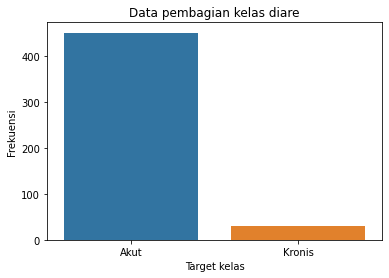

In [50]:
#drop missing data
data = da.dropna()
print('Jumlah missing data: ', (len(da)-len(data)),'\n')

#data = data.drop(columns='Umur')
#data = data.drop(columns='Nyeri di Perut')
#data = data.drop(columns='Demam')
#data = data.drop(columns='Mulut Kering')
#data = data.drop(columns='Muntah')
#data = data.drop(columns='BAB lebih dari 3x sehari')
#data = data.drop(columns='BAB lebih dari 2 minggu')
#data = data.drop(columns='Feses Encer')

# renaming label column on dataset
data = data.rename(columns={'BAB lebih dari 2 minggu':'BAB_1',
                                    'BAB lebih dari 3x Sehari':'BAB_2',
                                    'Feses Encer':'FE',
                                    'Feses Berdarah/Berlendir':'FBoB'})


#Check pembagian tiap target class
sns.countplot(x = data['Diare'])
plt.title('Data pembagian kelas diare')
plt.xlabel('Target kelas')
plt.ylabel('Frekuensi')

In [51]:
data

,Muntah,BAB_1,BAB_2,FE,FBoB,Diare
0,Ya,Tidak,Ya,Tidak,Berlendir,Akut
1,Tidak,Tidak,Ya,Ya,Tidak,Akut
2,Tidak,Tidak,Tidak,Ya,Berlendir,Akut
3,Tidak,Tidak,Ya,Tidak,Berlendir,Akut
4,Ya,Tidak,Ya,Tidak,Berlendir,Akut
...,...,...,...,...,...,...
498,Tidak,Ya,Ya,Ya,Berdarah,Kronis
499,Tidak,Ya,Ya,Ya,Berdarah,Kronis
501,Ya,Tidak,Tidak,Ya,Berdarah,Akut
502,Tidak,Tidak,Ya,Ya,Tidak,Akut


In [52]:
#Encode using LabelEncoder

le = LabelEncoder()
clf= DecisionTreeClassifier()
X = data.drop(columns='Diare')
y = data['Diare']

#applying label encoder untuk tiap atribut predictor
X = X.apply(le.fit_transform)
X

,Muntah,BAB_1,BAB_2,FE,FBoB
0,1,0,1,0,1
1,0,0,1,1,2
2,0,0,0,1,1
3,0,0,1,0,1
4,1,0,1,0,1
...,...,...,...,...,...
498,0,1,1,1,0
499,0,1,1,1,0
501,1,0,0,1,0
502,0,0,1,1,2


Counter({'Akut': 359, 'Kronis': 26}) 

              precision    recall  f1-score   support

        Akut       1.00      1.00      1.00        92
      Kronis       1.00      1.00      1.00         5

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



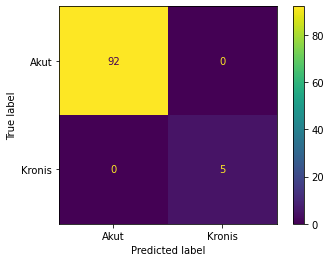

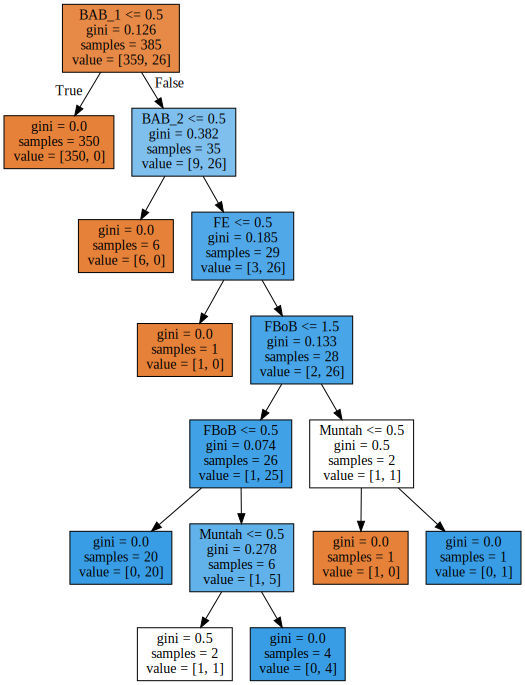



|--- feature_1 <= 0.50
|   |--- class: Akut
|--- feature_1 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: Akut
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: Akut
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_4 <= 1.50
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- class: Kronis
|   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |--- class: Akut
|   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |--- class: Kronis
|   |   |   |--- feature_4 >  1.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- class: Akut
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- class: Kronis



In [53]:
def normal():
  #Splitting data train and test
  X_train, X_test, y_train, y_test = tt(X,y, test_size=0.2, random_state=20)
  print(Counter(y_train), '\n')
  
  #Proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  #acc = metrics.accuracy_score(y_test, y_pred)*100
  joblib.dump(clf, 'normal.pkl')
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=X.columns, 
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

normal()

Counter({'Akut': 361, 'Kronis': 360})
              precision    recall  f1-score   support

        Akut       1.00      1.00      1.00        90
      Kronis       1.00      1.00      1.00        91

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



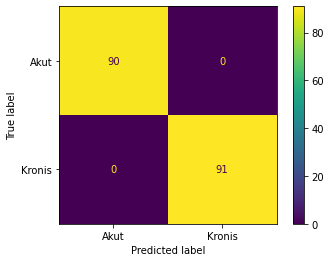

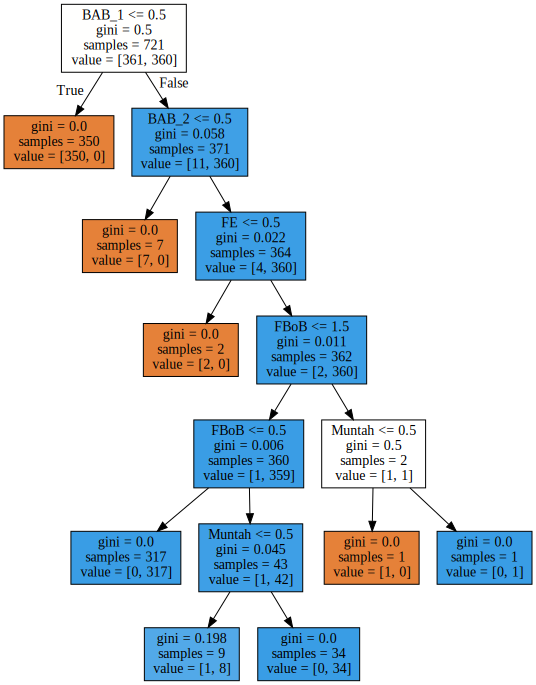



|--- feature_1 <= 0.50
|   |--- class: Akut
|--- feature_1 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: Akut
|   |--- feature_2 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: Akut
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_4 <= 1.50
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- class: Kronis
|   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |--- class: Kronis
|   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |--- class: Kronis
|   |   |   |--- feature_4 >  1.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- class: Akut
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- class: Kronis



In [54]:
def over():
  oversample = SMOTE(random_state=20)
  X_over, y_over = oversample.fit_resample(X,y)
  X_train, X_test, y_train, y_test = tt(X_over, y_over, test_size=0.2, random_state=8)
  print(Counter(y_train))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  #acc = metrics.accuracy_score(y_test, y_pred)*100
  joblib.dump(clf, 'over.pkl')
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=X.columns, 
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

over()

Counter({'Kronis': 25, 'Akut': 24})
              precision    recall  f1-score   support

        Akut       0.88      1.00      0.93         7
      Kronis       1.00      0.83      0.91         6

    accuracy                           0.92        13
   macro avg       0.94      0.92      0.92        13
weighted avg       0.93      0.92      0.92        13



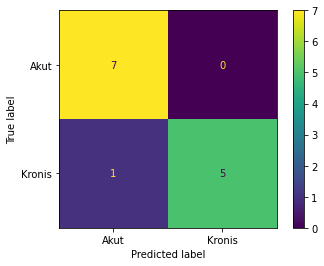

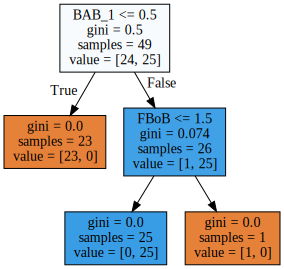



|--- feature_1 <= 0.50
|   |--- class: Akut
|--- feature_1 >  0.50
|   |--- feature_4 <= 1.50
|   |   |--- class: Kronis
|   |--- feature_4 >  1.50
|   |   |--- class: Akut



In [55]:
def under():
  #get balanced data sample also splitting data train and test
  rus = RandomUnderSampler(random_state=8)
  X_under, y_under = rus.fit_resample(X,y)
  X_train, X_test, y_train, y_test = tt(X_under, y_under, test_size=0.2, random_state = 3)
  print(Counter(y_train))

  #proceed model
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  #acc = metrics.accuracy_score(y_test, y_pred)*100
  joblib.dump(clf, 'under.pkl')
  plot_confusion_matrix(clf, X_test, y_test)
  plt.show()
  print('\n')

  #tree viz and tree text
  graph= Source(tree.export_graphviz(clf, feature_names=X.columns, 
                                     filled=True))
  display(SVG(graph.pipe(format='svg')))
  print('\n')
  tree_root = export_text(clf)
  print(tree_root)

under()

# Test Predict start here

In [56]:
def test_normal():
  while True:
    class CustomException(Exception):
      pass #print('Please input integer between 0 and 2')

    try:
      print('======================================================')
      print('\t\t\t START')
      print('======================================================')
      #de = int(input('\n  kondisi demam. 1 untuk ya, 0 untuk tidak: '))
      #if de > 1 or de < 0:
      #  raise AssertionError

      mu = int(input('\n  kondisi muntah. 1 untuk ya, 0 untuk tidak: '))
      if mu > 1 or mu < 0:
        raise AssertionError
      
      mk = int(input('\n  kondisi mulut kering. 1 untuk ya, 0 untuk tidak: '))
      if mk > 1 or mk < 0:
        raise AssertionError
      
      #ny = int(input('\n  kondisi nyeri di perut. 1 untuk ya, 0 untuk tidak: '))
      #if ny > 1 or ny < 0:
      #  raise AssertionError
      
      bab1 = int(input('\n  kondisi BAB lebih dari 2 minggu. 1 untuk ya, 0 untuk tidak: '))
      if bab1 > 1 or bab1 < 0:
        raise AssertionError
      
      bab2 = int(input('\n  kondisi BAB lebih dari 3x sehari. 1 untuk ya, 0 untuk tidak: '))
      if bab2 > 1 or bab2 < 0:
        raise AssertionError
      
      fe = int(input('\n  kondisi feses encer. 1 untuk ya, 0 untuk tidak: '))
      if fe > 1 or fe < 0:
        raise AssertionError
      
      fb = int(input('\n  kondisi feses berdarah atau berlendir. 2 untuk tidak sama sekali, 1 untuk berlendir, 0 untuk berdarah: '))
      if fb > 2 or fb < 0:
        raise CustomException
      break
    except ValueError:
      print('Please input integer only...')
    except AssertionError:
      print('Please input integer between 1 or 0')
    except CustomException:
      print('Please input integer between 0 and 2')
      continue

  #pred = [[de,mu,mk,ny,bab1,bab2,fe,fb]]
  #print('\n  Binary Input',pred)

  pred = [[mu,mk,bab1,bab2,fe,fb]]
  print('\n  Binary Input',pred)

  load_model = joblib.load('normal.pkl')
  result=(load_model.predict(pred))
  print('\n  Result:',result)
  print('======================================================')
  print('\t\t\t END')
  print('======================================================')

#test_normal()

In [57]:
def test_over():
  while True:
    class CustomException(Exception):
      pass

    try:
      print('======================================================')
      print('\t\t\t START')
      print('======================================================')
      de = int(input('\n  kondisi demam. 1 untuk ya, 0 untuk tidak: '))
      if de > 1 or de < 0:
        raise AssertionError

      mu = int(input('\n  kondisi muntah. 1 untuk ya, 0 untuk tidak: '))
      if mu > 1 or mu < 0:
        raise AssertionError
      
      mk = int(input('\n  kondisi mulut kering. 1 untuk ya, 0 untuk tidak: '))
      if mk > 1 or mk < 0:
        raise AssertionError
      
      ny = int(input('\n  kondisi nyeri di perut. 1 untuk ya, 0 untuk tidak: '))
      if ny > 1 or ny < 0:
        raise AssertionError
      
      bab1 = int(input('\n  kondisi BAB lebih dari 2 minggu. 1 untuk ya, 0 untuk tidak: '))
      if bab1 > 1 or bab1 < 0:
        raise AssertionError
      
      bab2 = int(input('\n  kondisi BAB lebih dari 3x sehari. 1 untuk ya, 0 untuk tidak: '))
      if bab2 > 1 or bab2 < 0:
        raise AssertionError
      
      fe = int(input('\n  kondisi feses encer. 1 untuk ya, 0 untuk tidak: '))
      if fe > 1 or fe < 0:
        raise AssertionError
      
      fb = int(input('\n  kondisi feses berdarah atau berlendir. 2 untuk tidak sama sekali, 1 untuk berlendir, 0 untuk berdarah: '))
      if fb > 2 or fb < 0:
        raise CustomException
      break
    except ValueError:
      print('Please input integer only...')
    except AssertionError:
      print('Please input integer between 1 or 0')
    except CustomException:
      print('Please input integer between 0 and 2')
      continue

  pred = [[de,mu,mk,ny,bab1,bab2,fe,fb]]
  print('\n  Binary Input',pred)

  load_model = joblib.load('over.pkl')
  result=(load_model.predict(pred))
  print('\n  Result:',result)
  print('======================================================')
  print('\t\t\t END')
  print('======================================================')

#test_over()

In [58]:
def test_under():
  while True:
    class CustomException(Exception):
      pass
      
    try:
      print('======================================================')
      print('\t\t\t START')
      print('======================================================')
      de = int(input('\n  kondisi demam. 1 untuk ya, 0 untuk tidak: '))
      if de > 1 or de < 0:
        raise AssertionError

      mu = int(input('\n  kondisi muntah. 1 untuk ya, 0 untuk tidak: '))
      if mu > 1 or mu < 0:
        raise AssertionError
      
      mk = int(input('\n  kondisi mulut kering. 1 untuk ya, 0 untuk tidak: '))
      if mk > 1 or mk < 0:
        raise AssertionError
      
      ny = int(input('\n  kondisi nyeri di perut. 1 untuk ya, 0 untuk tidak: '))
      if ny > 1 or ny < 0:
        raise AssertionError
      
      bab1 = int(input('\n  kondisi BAB lebih dari 2 minggu. 1 untuk ya, 0 untuk tidak: '))
      if bab1 > 1 or bab1 < 0:
        raise AssertionError
      
      bab2 = int(input('\n  kondisi BAB lebih dari 3x sehari. 1 untuk ya, 0 untuk tidak: '))
      if bab2 > 1 or bab2 < 0:
        raise AssertionError
      
      fe = int(input('\n  kondisi feses encer. 1 untuk ya, 0 untuk tidak: '))
      if fe > 1 or fe < 0:
        raise AssertionError
      
      fb = int(input('\n  kondisi feses berdarah atau berlendir. 2 untuk tidak sama sekali, 1 untuk berlendir, 0 untuk berdarah: '))
      if fb > 2 or fb < 0:
        raise CustomException
      break
    except ValueError:
      print('Please input integer only...')
    except AssertionError:
      print('Please input integer between 1 or 0')
    except CustomException:
      print('Please input integer between 0 and 2')
      continue

  pred = [[de,mu,mk,ny,bab1,bab2,fe,fb]]
  print('\n  Binary Input',pred)

  load_model = joblib.load('under.pkl')
  result=(load_model.predict(pred))
  print('\n  Result:',result)
  print('======================================================')
  print('\t\t\t END')
  print('======================================================')


#test_under()

# Misc

In [59]:
def fast_n():
  predfast = [[0,1,0,1,0,1,1,2]]
  model = joblib.load('normal.pkl')
  hasil = (model.predict(predfast))

  print('\n Prediksi normal', hasil)
#fast_n()

def fast_o():
  predfast = [[0,1,0,1,0,1,1,2]]
  model = joblib.load('over.pkl')
  hasil = (model.predict(predfast))

  print('\n Prediksi over', hasil)
#fast_o()

def fast_u():
  predfast = [[0,1,0,1,0,1,1,2]]
  model = joblib.load('under.pkl')
  hasil = (model.predict(predfast))

  print('\n Prediksi under', hasil)
#fast_u()

In [60]:

def counter():
  le = LabelEncoder()
  clf= DecisionTreeClassifier(criterion='gini')
  X = data.drop(columns='Diare')
  y  = data['Diare']

  #applying label encoder untuk tiap atribut predictor
  X = X.apply(le.fit_transform)
  X_train, X_test, y_train, y_test = tt(X,y, test_size=0.2, random_state=20)
  print('Normal')
  print(Counter(y_train), 'Train' )
  print(Counter(y_test), 'Test')

  oversample = SMOTE(random_state=20)
  X_over, y_over = oversample.fit_resample(X,y)
  XX_train, XX_test, yy_train, yy_test = tt(X_over, y_over, test_size=0.2, random_state=8)
  print( '\nSMOTE')
  print(Counter(yy_train), 'Train' )
  print(Counter(yy_test), 'Test')

  rus = RandomUnderSampler(random_state=8)
  X_under, y_under = rus.fit_resample(X,y)
  XXX_train, XXX_test, yyy_train, yyy_test = tt(X_under, y_under, test_size=0.2, random_state=3)
  print('\nRandom Undersampling')
  print(Counter(yyy_train), 'Train' )
  print(Counter(yyy_test), 'Test')

counter()

Normal
Counter({'Akut': 359, 'Kronis': 26}) Train
Counter({'Akut': 92, 'Kronis': 5}) Test

SMOTE
Counter({'Akut': 361, 'Kronis': 360}) Train
Counter({'Kronis': 91, 'Akut': 90}) Test

Random Undersampling
Counter({'Kronis': 25, 'Akut': 24}) Train
Counter({'Akut': 7, 'Kronis': 6}) Test


In [61]:
def sample():
  le = LabelEncoder()
  clf= DecisionTreeClassifier(criterion='gini')
  X = data.drop(columns='Diare')
  y  = data['Diare']
  X = X.apply(le.fit_transform)
  rus = RandomUnderSampler(random_state=8)
  X_under, y_under = rus.fit_resample(X,y)
  XXX_train, XXX_test, yyy_train, yyy_test = tt(X_under, y_under, test_size=0.2, random_state=3)
  print('\nUndersampling')
  print(XXX_train)
  #print(yyy_train)

def sampleNormal():
  le = LabelEncoder()
  clf= DecisionTreeClassifier(criterion='gini')
  X = data.drop(columns='Diare')
  y  = data['Diare']
  X = X.apply(le.fit_transform)
  X_train, X_test, y_train, y_test = tt(X,y, test_size = 0.2, random_state=8)
  print(X_test.head(10))

sample()


Undersampling
[[0 1 0 1 2]
 [1 1 1 1 1]
 [1 0 1 0 1]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [1 0 1 0 1]
 [0 1 1 1 0]
 [1 1 1 1 0]
 [1 0 1 1 0]
 [0 0 1 0 0]
 [1 1 1 1 0]
 [1 0 1 0 1]
 [0 0 1 0 1]
 [1 0 0 1 2]
 [0 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 1 0]
 [0 0 1 1 2]
 [1 1 1 1 0]
 [1 0 1 1 1]
 [1 1 1 1 0]
 [1 0 0 1 2]
 [1 0 0 1 2]
 [1 1 1 1 0]
 [1 0 0 1 1]
 [1 0 1 1 1]
 [0 0 1 1 0]
 [1 1 1 1 0]
 [1 0 0 1 2]
 [1 1 1 1 0]
 [1 0 1 1 2]
 [1 1 1 1 0]
 [0 1 1 1 0]
 [1 1 1 1 0]
 [0 1 1 1 1]
 [0 1 1 1 0]
 [1 1 1 1 0]
 [1 0 1 0 2]
 [1 0 0 1 2]
 [0 0 1 1 0]
 [0 0 1 1 1]
 [1 0 0 1 1]
 [0 1 1 1 0]
 [1 0 1 1 1]
 [1 1 1 1 0]
 [1 0 0 1 1]
 [1 1 1 1 0]]
